In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-08-10 02:19:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   201MB/s    in 0.3s    

2022-08-10 02:19:35 (201 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!unzip -qq /content/cats_and_dogs_filtered.zip

In [4]:
train_dir = '/content/cats_and_dogs_filtered/train'
test_dir = '/content/cats_and_dogs_filtered/validation'

# Dataset 

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

In [7]:
test_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

In [8]:
train_generator = train_datagen.flow_from_directory(
                      directory = train_dir, shuffle=True,
                      subset= 'training',
                      batch_size = 64,
                      target_size = (224,224),
                      class_mode = 'binary'   # 이진 분류
                  )

Found 1600 images belonging to 2 classes.


In [9]:
val_generator = train_datagen.flow_from_directory(
                      directory = train_dir, shuffle=True,
                      subset= 'validation',
                      batch_size = 64,
                      target_size = (224,224),
                      class_mode = 'binary'   # 이진 분류
                  )

Found 400 images belonging to 2 classes.


In [10]:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size = 1,
    target_size = (224,224),
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [20]:
def build_model():
  model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),   # // 특징 추출 레이어
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])
  return model

In [21]:
model = build_model()

In [22]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics = ['acc'])

In [26]:
history = model.fit(train_generator, validation_data = val_generator,epochs=3,batch_size=64)

Epoch 1/3
25/25 [==============================] - 119s 5s/step - loss: 0.6709 - acc: 0.5775 - val_loss: 0.6420 - val_acc: 0.6325
Epoch 2/3
25/25 [==============================] - 111s 4s/step - loss: 0.5897 - acc: 0.6812 - val_loss: 0.6023 - val_acc: 0.6700
Epoch 3/3
25/25 [==============================] - 109s 4s/step - loss: 0.4974 - acc: 0.7506 - val_loss: 0.6314 - val_acc: 0.6700


In [27]:
# 결과 시각화 함수

def plot_history(history):
  hist = history.history
  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  plt.plot(history.epoch, hist['loss'], label="loss")
  plt.plot(history.epoch, hist['val_loss'], label='val_loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(history.epoch, hist['acc'], label="acc")
  plt.plot(history.epoch, hist['val_acc'], label='val_acc')
  plt.legend()
  plt.show()

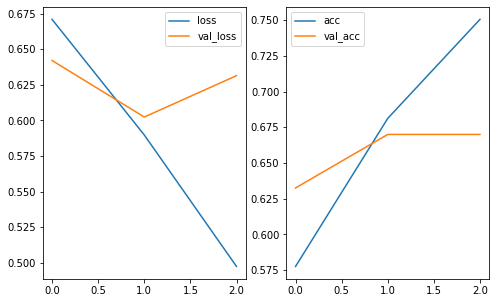

In [28]:
plot_history(history)

In [29]:
model.evaluate(test_generator)

1000/1000 [==============================] - 24s 24ms/step - loss: 0.6232 - acc: 0.6740


[0.6232300400733948, 0.6740000247955322]